**For tqdm progress bar to work correctly, before launching this notebook run:**
```bash
$ jupyter nbextension enable --py --sys-prefix widgetsnbextension
```

**Also for GIF to appear launch jupyter as follows:**
```bash
$ jupyter notebook --NotebookApp.iopub_data_rate_limit=100000000
```

**Or simply run from project root:**
```bash
$ make jupyter
```
### imports

In [1]:
import numpy as np
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import matplotlib
import matplotlib.pyplot as plt
from JSAnimation.IPython_display import display_animation

import env
from bm.dbm import DBM
from bm.rbm import GaussianRBM, MultinomialRBM
from bm.utils import (progress_bar, Stopwatch,
                      im_plot, im_reshape, im_gif, tick_params)
from bm.utils.dataset import (load_cifar10, plot_cifar10, 
                              im_unflatten, im_rescale)

%matplotlib inline
%load_ext autoreload
%autoreload 2

## load CIFAR-10

In [5]:
X, y = load_cifar10(mode='train', path='../data/')
print X.shape, y.shape

(50000, 3072) (50000,)


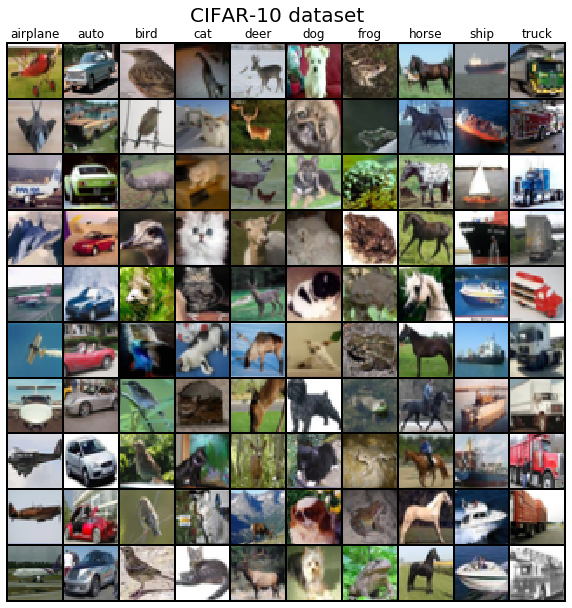

In [6]:
plt.figure(figsize=(10, 10))
plot_cifar10(im_unflatten(X[:1000]), y[:1000], samples_per_class=10)
plt.savefig('cifar10.png', dpi=196, bbox_inches='tight')

## load smoothed CIFAR-10 
#### (the difference is hardly visible, though)

In [7]:
X_s = np.load('../data/X_s.npy')
print X_s.shape, X_s.dtype

(1000, 3072) float32


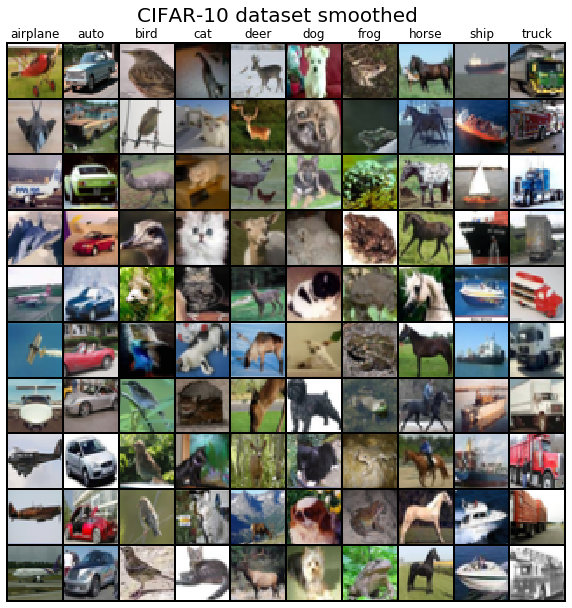

In [9]:
plt.figure(figsize=(10, 10))
plot_cifar10(im_unflatten(X[:1000]), y[:1000], samples_per_class=10, title='CIFAR-10 smoothed')
plt.savefig('cifar10.png', dpi=196, bbox_inches='tight')

## load pre-trained Gaussian RBM

(3072, 5000)


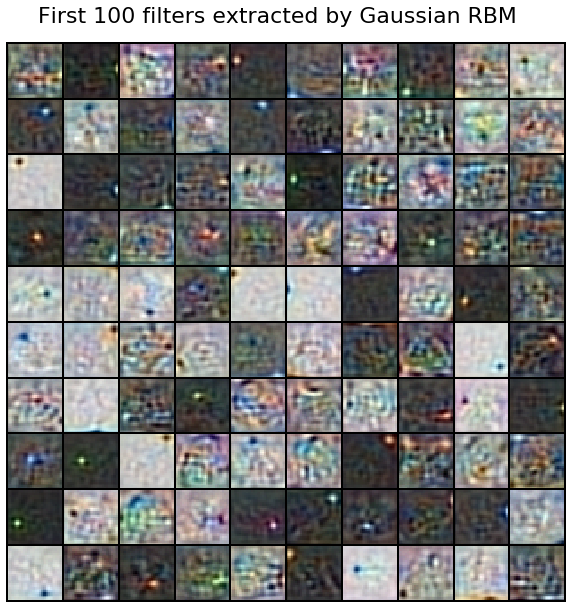

In [3]:
# load RBM weights
grbm = GaussianRBM.load_model('../models/grbm_cifar_naive/')
grbm_W = grbm.get_tf_params(scope='weights')['W']
print grbm_W.shape

# prepare for plotting
W = im_rescale( grbm_W.copy().T )

# plot
fig = plt.figure(figsize=(10, 10))
im_plot(W, title='First 100 filters extracted by Gaussian RBM')
plt.savefig('dbm_cifar_naive_grbm.png', dpi=196, bbox_inches='tight');

## fit Logistic Regression to extracted G-RBM features

### plot confusion matrix

## load pre-trained Multinomial RBM

(5000, 1000)


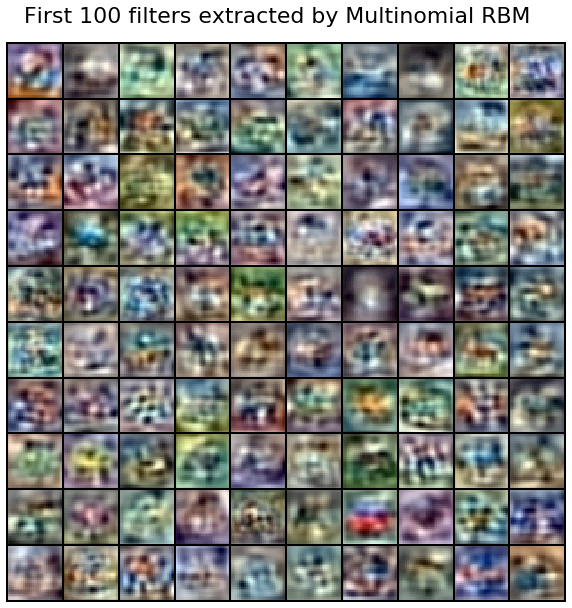

In [4]:
# load RBM weights
mrbm = MultinomialRBM.load_model('../models/mrbm_cifar_naive/')
mrbm_W = mrbm.get_tf_params(scope='weights')['W']
print mrbm_W.shape

# prepare for plotting
W = grbm_W.dot(mrbm_W)
W = im_rescale( W.T )

# plot
fig = plt.figure(figsize=(10, 10))
im_plot(W, title='First 100 filters extracted by Multinomial RBM')
plt.savefig('dbm_cifar_naive_mrbm.png', dpi=196, bbox_inches='tight');

## load trained DBM and visualize filters in layers 1 and 2

In [5]:
dbm = DBM.load_model('../models/dbm_cifar_naive/')
dbm.load_rbms([grbm, mrbm])  # !!!

In [6]:
weights = dbm.get_tf_params('weights')
W1 = weights['W']
W2 = weights['W_1']
print W1.shape, W2.shape

(3072, 5000) (5000, 1000)


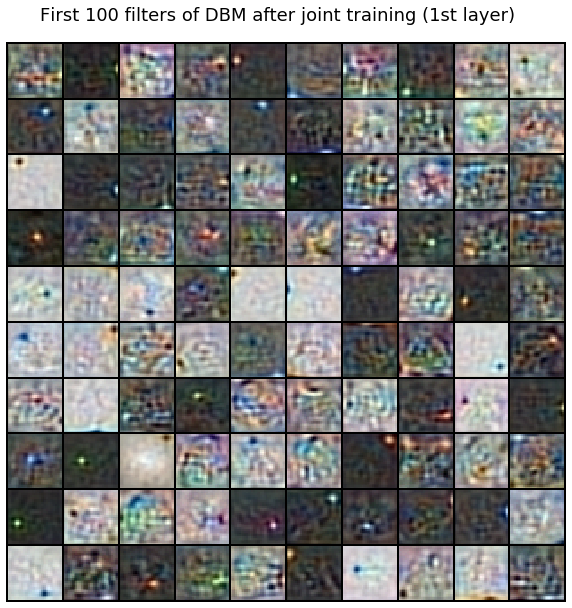

In [8]:
# prepare for plotting
W = im_rescale( W1.T )

# plot
fig = plt.figure(figsize=(10, 10))
im_plot(W, title='First 100 filters of DBM after joint training (1st layer)',
        title_params={'fontsize': 18})
plt.savefig('dbm_cifar_naive_W1_joint.png', dpi=196, bbox_inches='tight');

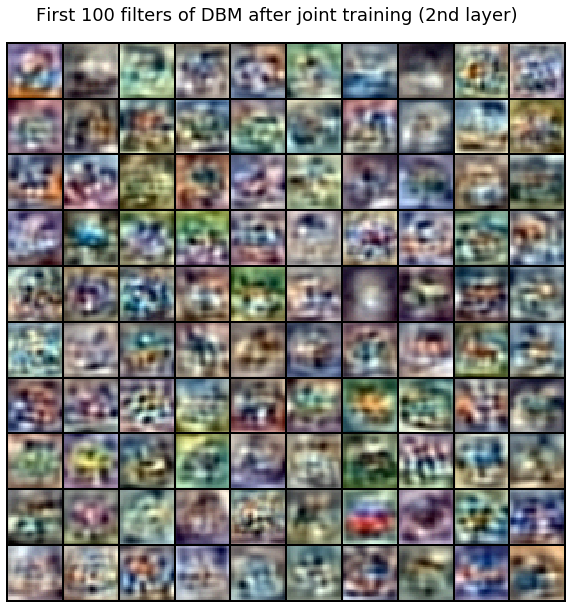

In [10]:
# prepare for plotting
W = W1.dot(W2)
W = im_rescale( W.T )

# plot
fig = plt.figure(figsize=(10, 10))
im_plot(W, title='First 100 filters of DBM after joint training (2nd layer)', 
        title_params={'fontsize': 18})
plt.savefig('dbm_cifar_naive_W2_joint.png', dpi=196, bbox_inches='tight');

# generate samples after training

In [ ]:
V = dbm.sample_v(n_gibbs_steps=0)
print V.shape
X_mean = np.load('../data/X_s_mean.npy')
X_std = np.load('../data/X_s_std.npy')
V = im_rescale(V, mean=X_mean, std=X_std)

## generate more samples
**(note that new samples override previous particles on disk)**

## make an animation and save to disk